## Problem Tanımı:
Bu defterde farklı çeşit görselleri sınıflandırabilen bir evrişimli sinir ağları (CNN) modeli geliştireceğiz. Kullandığımız Cifar10 veri setinde 10 farklı görsel sınıfımız mevcut:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

## Kütüphaneler

In [ ]:
# Gerekli kütüphaneler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML kütüphaneleri
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

# CNN Kütüphaneleri
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To ignore the errors
import warnings
warnings.filterwarnings("ignore")

## Veri setini yükleme

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Veri Görselleştirme

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes, counts = np.unique(y_train, return_counts=True)

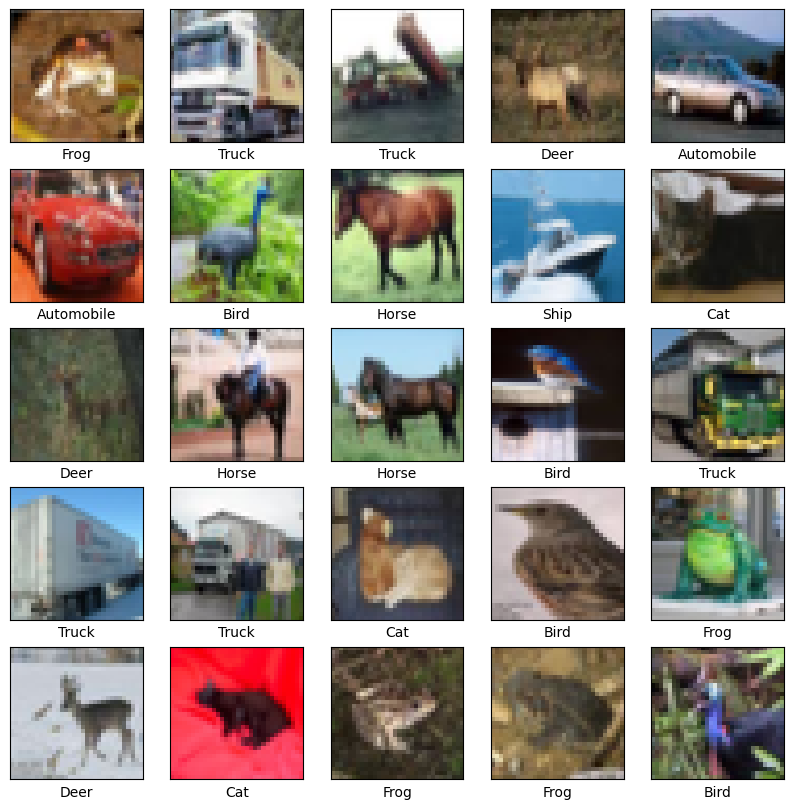

In [ ]:
# Veri setindeki ilk 20 görsel

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Veri Önişleme

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

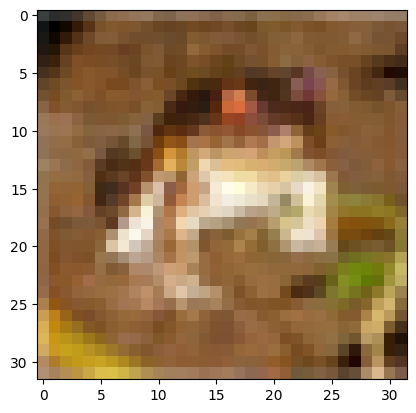

In [ ]:
# Rastgele veri görselleştirme

plt.figure()
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

## CNN Model Geliştirme


In [ ]:
model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(64, activation='relu'),
      Dropout(0.5),
      Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.metrics.Precision()])

In [ ]:
# Early stopping to prevent from overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
import numpy as np

print(np.unique(y_train))
print(np.unique(y_test))

[0. 1.]
[0. 1.]


## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
datagen.fit(X_train)

In [51]:
hist = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                 epochs=15,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping])

Epoch 1/15
391/391 [==============================] - 99s 254ms/step - loss: 1.1239 - accuracy: 0.6137 - precision_1: 0.7665 - val_loss: 1.0315 - val_accuracy: 0.6580 - val_precision_1: 0.7564
Epoch 2/15
391/391 [==============================] - 87s 223ms/step - loss: 1.1180 - accuracy: 0.6173 - precision_1: 0.7673 - val_loss: 0.9988 - val_accuracy: 0.6584 - val_precision_1: 0.7572
Epoch 3/15
391/391 [==============================] - 84s 215ms/step - loss: 1.0949 - accuracy: 0.6255 - precision_1: 0.7734 - val_loss: 1.0178 - val_accuracy: 0.6616 - val_precision_1: 0.7539
Epoch 4/15
391/391 [==============================] - 86s 220ms/step - loss: 1.0773 - accuracy: 0.6332 - precision_1: 0.7746 - val_loss: 0.9554 - val_accuracy: 0.6750 - val_precision_1: 0.7800
Epoch 5/15
391/391 [==============================] - 85s 217ms/step - loss: 1.0621 - accuracy: 0.6361 - precision_1: 0.7766 - val_loss: 0.9119 - val_accuracy: 0.6872 - val_precision_1: 0.7871
Epoch 6/15
391/391 [===============

In [52]:
# Test verisinde modeli değerlendirelim
evaluation = model.evaluate(X_test, y_test, verbose=2)

# Değerlendirme sonuçları
print("\nTest loss, Test accuracy, Test precision:", evaluation)


313/313 - 6s - loss: 0.8663 - accuracy: 0.7139 - precision_1: 0.7986 - 6s/epoch - 20ms/step

Test loss, Test accuracy, Test precision: [0.8663192391395569, 0.7139000296592712, 0.7985996007919312]


## Sonuçlandırma ve Grafikler

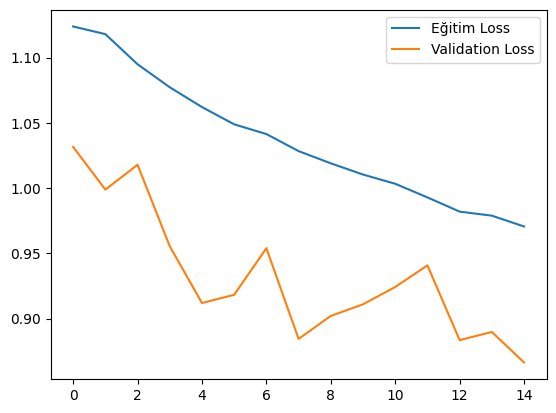

In [53]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

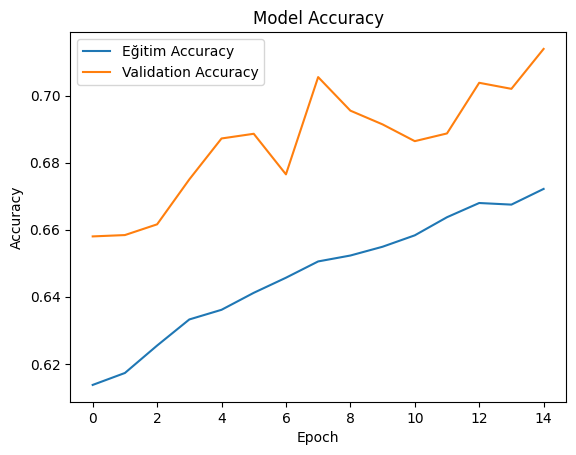

In [54]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

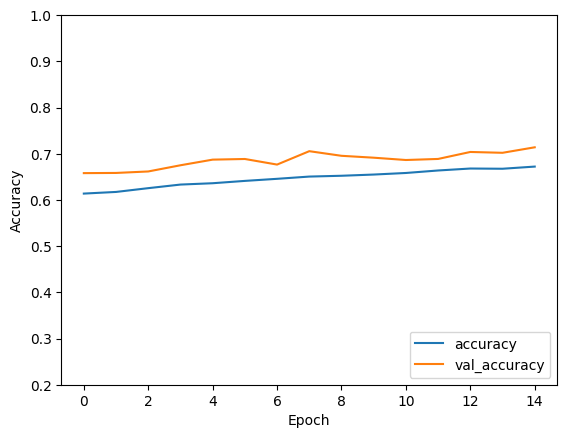

313/313 - 7s - loss: 0.8663 - accuracy: 0.7139 - precision_1: 0.7986 - 7s/epoch - 21ms/step

Test loss: 0.8663192391395569
Test accuracy: 0.7139000296592712


In [55]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()

evaluation = model.evaluate(X_test, y_test, verbose=2)

print("\nTest loss:", evaluation[0])
print("Test accuracy:", evaluation[1])

## Bir görsel üzerinde modeli deneme

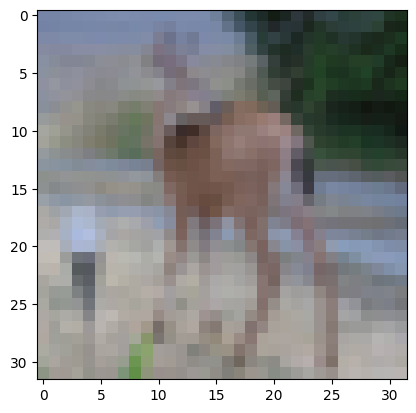

1/1 [==============================] - 0s 405ms/step
The model predicts that image 100 is a Horse


In [56]:
# Sınıf adlarını numaralandırılmış bir sözlük olarak tanımlayın
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

img = X_test[100]
plt.imshow(img)
plt.show()

# Image 100'ün bir geyik olduğunu biliyoruz.
pred_100 = np.argmax(model.predict(img.reshape(1, 32, 32, 3)))
print(f"The model predicts that image 100 is a {class_names[pred_100]}")

## Model Değerlendirme

In [57]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train_reshaped, y_train)

RandomForestClassifier()

In [65]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

y_pred = rf.predict(X_test_reshaped)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.0799
F1 Score: 0.1338655055075278
Recall: 0.0799
Precision: 0.8709878747308323
